In [5]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn import svm

import sklearn

import matplotlib

import warnings 

In [6]:
df_original = pd.read_csv('online_shoppers_intention.csv')
df_original

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [7]:
print(df_original.isna().sum())

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64


In [8]:
df_original = df_original.dropna(how='any')

In [9]:
print(df_original.isna().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


c:\Users\Familia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Venda ou Náo Venda'}, xlabel='Revenue', ylabel='count'>

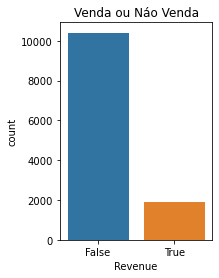

In [10]:
plt.subplot(1,2,2)
plt.title("Venda ou Náo Venda")
sns.countplot(df_original['Revenue'])

In [11]:
lb= LabelEncoder()
df_original['Month'] = lb.fit_transform(df_original['Month'])
df_original['VisitorType'] = lb.fit_transform(df_original['VisitorType']) #para voltar só rodar novamente
df_original

C:\Users\Familia\AppData\Local\Temp\ipykernel_12928\723895963.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_original['Month'] = lb.fit_transform(df_original['Month'])
C:\Users\Familia\AppData\Local\Temp\ipykernel_12928\723895963.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_original['VisitorType'] = lb.fit_transform(df_original['VisitorType']) #para voltar só rodar novamente


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,2,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,2,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,2,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,2,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,2,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,1,4,6,1,1,2,True,False
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,7,3,2,1,8,2,True,False
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,7,3,2,1,13,2,True,False
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,7,2,2,3,11,2,False,False


In [12]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


c:\Users\Familia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


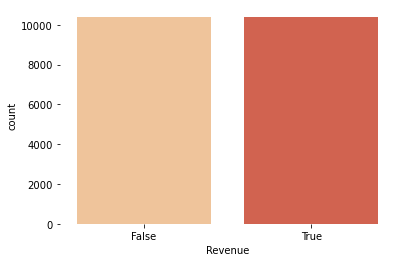

In [13]:
import imblearn 
from imblearn.over_sampling import SMOTE

seed = 42

X = df_original.iloc[:,0:17]
y = df_original.iloc[:,17]

smote_bal = SMOTE(random_state=seed) #instanciei a classe smote com a semente

Xres, yres = smote_bal.fit_resample(X,y)

X= Xres
y= yres

sns.countplot(y, palette='OrRd')
plt.box(False)
plt.show()

In [14]:
print(X.shape)
print(y.shape)

(20816, 17)
(20816,)


In [15]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y, test_size=0.3, random_state=42)
#cria a amostra para treino e a teste

In [16]:
sc = StandardScaler() #encapsular o scaler
X_treino_scaled = sc.fit_transform(X_treino) #normaliza X treino
X_teste_scaled = sc.transform(X_teste) #normalmente nao se faz o fit na base teste, usa-se a formula fit do treino no teste
#fit_transform no treino, transform no teste

In [17]:
model = svm.SVC(kernel='linear')

In [18]:
model.fit(X_treino_scaled, y_treino)

SVC(kernel='linear')

In [19]:
previsao = model.predict(X_treino_scaled)

In [20]:
SVM_dic_metrics = {'accuracy_score':accuracy_score(previsao, y_treino),
                  'confusion_matrix':confusion_matrix(previsao,y_treino)}
print(SVM_dic_metrics)

{'accuracy_score': 0.846544506210967, 'confusion_matrix': array([[6640, 1557],
       [ 679, 5695]], dtype=int64)}


In [21]:
previsao2=model.predict(X_teste_scaled)
SVM_dic_metrics2 = {'accuracy_score':accuracy_score(previsao2, y_teste),
                  'confusion_matrix':confusion_matrix(previsao2,y_teste)}
print(SVM_dic_metrics2)

{'accuracy_score': 0.8417934347477982, 'confusion_matrix': array([[2779,  678],
       [ 310, 2478]], dtype=int64)}


<AxesSubplot:>

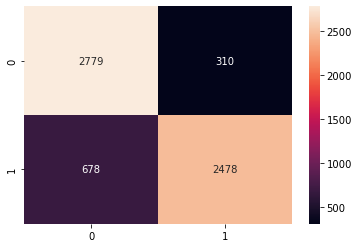

In [22]:
import seaborn as sns
cm = confusion_matrix(y_teste, previsao2)
sns.heatmap(cm, annot=True, fmt='d')
#plot da matrix de confusao

pip install bayesian-optimization

In [31]:
param={'C':[10.1,150],
            'gamma':[0.001,0.87]}

In [28]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.model_selection import cross_val_score,KFold

kf = KFold(n_splits=20,shuffle=True,random_state=44)# shuffle e o embaralhamento
cross_val_score(SVC(C=30.1,gamma=0.049,kernel='rbf'),
                    X_treino_scaled,y_treino,cv=kf,scoring="accuracy")

array([0.90123457, 0.89163237, 0.90260631, 0.89986283, 0.87928669,
       0.89711934, 0.89437586, 0.91083676, 0.89986283, 0.90672154,
       0.89163237, 0.90521978, 0.90659341, 0.88324176, 0.89285714,
       0.89835165, 0.89010989, 0.90384615, 0.9010989 , 0.89972527])

### Otimizacao Baysiana + Cross validation

<b>cross validation</b>, evita que cararcteriscas importantes deixem de ser escolhidas para fazer o treinamento do meu modelo, como padrao costumo usar 5 validacoes dessa selecao para garantir que o vies seixa baixo e poder avaliar a variancia do modelo<br><br>
<b>Metodo de Otimizacao de Bayes</b> metodo tem como funcao de um ponto aletorio, criar uma pontos de otimizacao no hiperparametros de modo que ele escolha o mais promissor executado. Exemplo dentro de 5 Execuções obtivemos <b>[89,85,87,88,89.1]</b>, ele selecionara baseado no melhor ponto os Hyperparametro(Exploration explotation tradeoff)<br><br>


In [32]:
from bayes_opt import BayesianOptimization,UtilityFunction


def train_mod(C,gamma):
    score=cross_val_score(SVC(C=C,gamma=gamma,kernel='rbf'),
                    X_treino_scaled,y_treino,cv=5,scoring="accuracy").mean()
    return score


opt = BayesianOptimization( train_mod , 
                            param,
                            random_state=777)
                            
opt.maximize(init_points=5,n_iter=30)# ele treina ate 5 pontos e escolhe a mais promisora
print(opt.max['params'],opt.max['target'])

|   iter    |  target   |     C     |   gamma   |
-------------------------------------------------
|  1        |  0.8958   |  31.46    |  0.2637   |
|  2        |  0.8959   |  18.78    |  0.4006   |
|  3        |  0.8848   |  127.0    |  0.8066   |
|  4        |  0.8852   |  111.8    |  0.6688   |
|  5        |  0.8888   |  47.76    |  0.5607   |
|  6        |  0.8882   |  19.94    |  0.6458   |
|  7        |  0.8953   |  18.86    |  0.4271   |
|  8        |  0.8913   |  17.54    |  0.572    |
|  9        |  0.8857   |  32.26    |  0.7317   |
|  10       |  0.8776   |  31.02    |  0.008864 |
|  11       |  0.8975   |  54.1     |  0.08182  |
|  12       |  0.8899   |  101.9    |  0.02272  |
|  13       |  0.8976   |  53.86    |  0.06559  |
|  14       |  0.8907   |  53.95    |  0.3539   |
|  15       |  0.8896   |  31.51    |  0.5764   |
|  16       |  0.8967   |  31.7     |  0.1686   |
|  17       |  0.8869   |  18.59    |  0.7043   |
|  18       |  0.8994   |  18.84    |  0.1133   |


In [110]:
def best_model(cv,params):
    '''
        funcao com a ideia de eploracao local, apos encontrar melhores parametros tentamos dentro
        de um espcao pequeno encontrar o melhor modelo
    '''
    inc_c = 0 # incremento c
    C,gama= params
    inc_g=0 # incremento gama
    pm = [] 
    ii=1
    for   i in range(cv):
        inc_c  = 0.099999999   
        inc_g = 0.102  
        cc = C+(inc_c*ii)
        gm  = gama+ (inc_g*ii)
        ii= (np.euler_gamma*cv)+i
        print(gm,cc)
        model2 = SVC(C=cc, gamma =gm)
        model2.fit(X_treino_scaled, y_treino)
        prev2 = model2.predict(X_teste_scaled)
        pm.append({'acuracia':accuracy_score(y_teste,prev2),'c':cc,'gamma':gm})
    return pm,inc_c,inc_g

best_model(5,(opt.max['params']['C'],opt.max['params']['gamma']))

0.2010929696749156 32.07823020900219
0.39347295877469735 32.266838039566885
0.4954729587746973 32.36683803856688
0.5974729587746974 32.46683803756688
0.6994729587746974 32.566838036566885


([{'acuracia': 0.9036028823058446,
   'c': 32.07823020900219,
   'gamma': 0.2010929696749156},
  {'acuracia': 0.9010408326661329,
   'c': 32.266838039566885,
   'gamma': 0.39347295877469735},
  {'acuracia': 0.898959167333867,
   'c': 32.36683803856688,
   'gamma': 0.4954729587746973},
  {'acuracia': 0.8955964771817454,
   'c': 32.46683803756688,
   'gamma': 0.5974729587746974},
  {'acuracia': 0.8946357085668535,
   'c': 32.566838036566885,
   'gamma': 0.6994729587746974}],
 0.099999999,
 0.102)

In [111]:

model2 = SVC(C=32.07823020900219, gamma =0.2010929696749156)
model2.fit(X_treino_scaled, y_treino)
prev2 = model2.predict(X_teste_scaled)     
accuracy_score(y_teste,prev2) 

0.9036028823058446

##### Apartir da busca otimizada de bayes encontramos a acuracia media de 90.001 %, considerando que efetuamos a validacoes na base para obter o melhor conjunto de treinamentos. Dado isso foi feito a construcao de um metodo para encontrar o melhor estimador local baseado na amplitde definida como 5 e obtivemos 90.36% 

## Obrigado